(-0.3, 0.3) (-1.5, 1.5) (-1.5, -1.5) (-2, 0.3)
(0, 2) (-1.5, 1.5) (-1.5, -1.5) (-0.3, 0.3)
(0.3, 0.3) (-1.5, 1.5) (-1.5, -1.5) (0, 2)
(2, 0) (-1.5, 1.5) (-1.5, -1.5) (0.3, 0.3)
(0.3, -0.3) (-1.5, 1.5) (-1.5, -1.5) (2, 0)
(0, -2) (-1.5, 1.5) (-1.5, -1.5) (0.3, -0.3)
(0.4, -1.5) (-1.5, 1.5) (-1.5, -1.5) (0, -2)
(-0.3, -0.3) (-1.5, 1.5) (-1.5, -1.5) (0.4, -1.5)
[-1.5, 0.12352941176470587] (-1.5, -1.5) (1.5, -1.5) (-0.3, -0.3)
[-1.5, 0.30000000000000004] (-1.5, -1.5) (1.5, -1.5) [-1.5, 0.12352941176470587]
(-0.3, 0.3) (-1.5, -1.5) (1.5, -1.5) [-1.5, 0.30000000000000004]
(0, 2) (-1.5, -1.5) (1.5, -1.5) (-0.3, 0.3)
(0.3, 0.3) (-1.5, -1.5) (1.5, -1.5) (0, 2)
(2, 0) (-1.5, -1.5) (1.5, -1.5) (0.3, 0.3)
(0.3, -0.3) (-1.5, -1.5) (1.5, -1.5) (2, 0)
(-0.3, -0.3) (-1.5, -1.5) (1.5, -1.5) (0.4, -1.5)
[-1.5, 0.12352941176470587] (1.5, -1.5) (1.5, 1.5) (-0.3, -0.3)
[-1.5, 0.30000000000000004] (1.5, -1.5) (1.5, 1.5) [-1.5, 0.12352941176470587]
(-0.3, 0.3) (1.5, -1.5) (1.5, 1.5) [-1.5, 0.3000000000000000

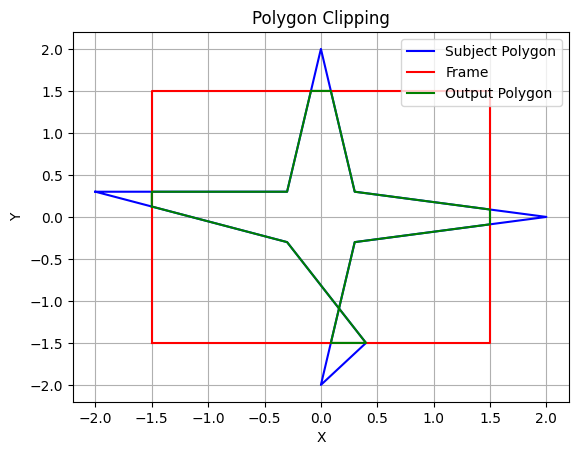

In [1]:
import matplotlib.pyplot as plt

# Function to perform polygon clipping
def clip(subjectPolygon, frame):
    # Function to check if a point is inside an edge
    def inside(p, cp1, cp2):
        # Original formula: (cp2[x] - cp1[x]) * (p[y] - cp1[y]) > (cp2[y] - cp1[y]) * (p[x] - cp1[x])
        return (cp2[0] - cp1[0]) * (p[1] - cp1[1]) > (cp2[1] - cp1[1]) * (p[0] - cp1[0])

    # Function to calculate the intersection point
    def intersection(cp1, cp2, s, e):
        dc = [cp1[0] - cp2[0], cp1[1] - cp2[1]]
        dp = [s[0] - e[0], s[1] - e[1]]
        n1 = cp1[0] * cp2[1] - cp1[1] * cp2[0]
        n2 = s[0] * e[1] - s[1] * e[0]
        n3 = 1.0 / (dc[0] * dp[1] - dc[1] * dp[0])
        # Original formula: [(n1 * dp[x] - n2 * dc[x]) * n3, (n1 * dp[y] - n2 * dc[y]) * n3]
        return [(n1 * dp[0] - n2 * dc[0]) * n3, (n1 * dp[1] - n2 * dc[1]) * n3]

    # Make a copy of the subject polygon
    outputList = subjectPolygon.copy()
    cp1 = frame[-1]  # Last point of the clip polygon
    for cp2 in frame:
        inputList = outputList
        outputList = []
        s = inputList[-1]  # Last point of the subject polygon
        for e in inputList:
            if inside(e, cp1, cp2):  # Check if point e is inside the edge formed by cp1 and cp2
                print(e, cp1, cp2, s)
                if not inside(s, cp1, cp2):  # Check if point s is outside the edge formed by cp1 and cp2
                    outputList.append(intersection(cp1, cp2, s, e))  # Add intersection point to output
                outputList.append(e)  # Add point e to output
            elif inside(s, cp1, cp2):  # Check if point s is inside the edge formed by cp1 and cp2
                outputList.append(intersection(cp1, cp2, s, e))  # Add intersection point to output
            s = e
        cp1 = cp2

    return outputList

# Create a subject polygon in the shape of a star
subjectPolygon = [(-2, 0.3), (-0.3, 0.3), (0, 2), (0.3, 0.3), (2, 0), (0.3, -0.3), (0, -2), (0.4, -1.5), (-0.3, -0.3)]

# Define the rectangular frame
frame= [(-1.5, -1.5), (1.5, -1.5), (1.5, 1.5), (-1.5, 1.5)]

# Call the clip function to obtain the output polygon
outputPolygon = clip(subjectPolygon, frame)

# Extract the x and y coordinates of the output polygon
output_x = [point[0] for point in outputPolygon]
output_y = [point[1] for point in outputPolygon]

# Plot the subject polygon
subject_x = [point[0] for point in subjectPolygon]
subject_y = [point[1] for point in subjectPolygon]
plt.plot(subject_x + [subject_x[0]], subject_y + [subject_y[0]], 'b-', label='Subject Polygon')

# Plot the clip polygon
clip_x = [point[0] for point in frame]
clip_y = [point[1] for point in frame]
plt.plot(clip_x + [clip_x[0]], clip_y + [clip_y[0]], 'r-', label='Frame')

# Plot the output polygon
plt.plot(output_x + [output_x[0]], output_y + [output_y[0]], 'g-', label='Output Polygon')

# Add labels and title to the plot
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polygon Clipping')
plt.grid(True)

# Display the plot
plt.show()
